In [71]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import gmaps
import os
import pandas as pd
from scipy.stats import linregress

In [2]:
# Limits of project: U.S. movie industry only
# Timeframe: 1997 – 2017
# Data source: IMDB
# Objective: research on the trends and continuing viability of the movie industry
# Charts and analysis to focus on:
#                 - examine movies made between the years 1997 thru 2017 and the growth of viewership
# 	                      based on gross income divided by average ticket price.
# 	                      (see Nick’s slack: https://www.natoonline.org/data/ticket-price/ )
#                - examine movie viewer demographics by gender
#                - examine movie viewer gender genre preferences
#                - examine movie viewer demographics by age
#                - examine movie viewer age genre preferences
#                - examine the top 5 production companies by gross income and their movie genre focus
#                - examine the bottom 5 production companies by gross income and their movie genre focus

In [3]:
IMDB_movies=pd.read_csv("Resources/IMDb movies.csv")
IMDB_ratings=pd.read_csv("Resources/IMDb ratings.csv")
IMDB_ratings

,imdb_title_id,weighted_average_vote,total_votes,mean_vote,median_vote,votes_10,votes_9,votes_8,votes_7,votes_6,...,females_30age_avg_vote,females_30age_votes,females_45age_avg_vote,females_45age_votes,top1000_voters_rating,top1000_voters_votes,us_voters_rating,us_voters_votes,non_us_voters_rating,non_us_voters_votes
0,tt0000574,6.1,537,6.3,6.0,54,17,55,121,122,...,6.0,19.0,6.6,14.0,6.3,64.0,6.0,89.0,6.2,309.0
1,tt0001892,5.9,171,6.1,6.0,5,6,17,41,52,...,5.8,4.0,6.5,8.0,5.9,29.0,6.2,27.0,6.0,114.0
2,tt0002101,5.2,420,5.2,5.0,12,8,16,60,89,...,5.5,14.0,6.2,20.0,4.9,57.0,5.5,197.0,4.7,103.0
3,tt0002130,7.0,2019,6.9,7.0,194,208,386,571,308,...,7.3,74.0,7.4,75.0,7.0,126.0,7.1,452.0,7.0,1076.0
4,tt0002199,5.7,438,5.8,6.0,28,15,42,75,114,...,4.8,10.0,6.5,15.0,5.7,56.0,5.9,161.0,5.7,164.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81268,tt9903716,7.2,219,8.1,9.0,86,37,33,15,17,...,5.6,6.0,6.7,3.0,2.0,4.0,5.0,14.0,7.1,45.0
81269,tt9905412,7.8,510,7.8,9.0,184,80,91,39,10,...,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,1.0,3.0
81270,tt9905462,8.4,604,8.1,9.0,280,80,101,31,9,...,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,4.0,3.0
81271,tt9911774,8.4,369,8.2,9.0,111,74,74,61,30,...,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,1.0,1.0


In [4]:
IMDB_movies

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,...,actors,description,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics
0,tt0000574,The Story of the Kelly Gang,The Story of the Kelly Gang,1906,1906-12-26,"Biography, Crime, Drama",70,Australia,NaN,Charles Tait,...,"Elizabeth Tait, John Tait, Norman Campbell, Be...",True story of notorious Australian outlaw Ned ...,6.1,537,$ 2250,NaN,NaN,NaN,7.0,7.0
1,tt0001892,Den sorte drøm,Den sorte drøm,1911,1911-08-19,Drama,53,"Germany, Denmark",NaN,Urban Gad,...,"Asta Nielsen, Valdemar Psilander, Gunnar Helse...",Two men of high rank are both wooing the beaut...,5.9,171,NaN,NaN,NaN,NaN,4.0,2.0
2,tt0002101,Cleopatra,Cleopatra,1912,1912-11-13,"Drama, History",100,USA,English,Charles L. Gaskill,...,"Helen Gardner, Pearl Sindelar, Miss Fielding, ...",The fabled queen of Egypt's affair with Roman ...,5.2,420,$ 45000,NaN,NaN,NaN,24.0,3.0
3,tt0002130,L'Inferno,L'Inferno,1911,1911-03-06,"Adventure, Drama, Fantasy",68,Italy,Italian,"Francesco Bertolini, Adolfo Padovan",...,"Salvatore Papa, Arturo Pirovano, Giuseppe de L...",Loosely adapted from Dante's Divine Comedy and...,7.0,2019,NaN,NaN,NaN,NaN,28.0,14.0
4,tt0002199,"From the Manger to the Cross; or, Jesus of Naz...","From the Manger to the Cross; or, Jesus of Naz...",1912,1913,"Biography, Drama",60,USA,English,Sidney Olcott,...,"R. Henderson Bland, Percy Dyer, Gene Gauntier,...","An account of the life of Jesus Christ, based ...",5.7,438,NaN,NaN,NaN,NaN,12.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81268,tt9903716,Jessie,Jessie,2019,2019-03-15,"Horror, Thriller",106,India,Telugu,Aswani Kumar V.,...,"Sritha Chandana, Pavani Gangireddy, Abhinav Go...","Set in an abandoned house, the film follows a ...",7.2,219,NaN,NaN,NaN,NaN,21.0,NaN
81269,tt9905412,Ottam,Ottam,2019,2019-03-08,Drama,120,India,Malayalam,Zam,...,"Nandu Anand, Roshan Ullas, Manikandan R. Achar...","Set in Trivandrum, the story of Ottam unfolds ...",7.8,510,INR 4000000,NaN,$ 4791,NaN,NaN,NaN
81270,tt9905462,Pengalila,Pengalila,2019,2019-03-08,Drama,111,India,Malayalam,T.V. Chandran,...,"Lal, Akshara Kishor, Iniya, Narain, Renji Pani...",An unusual bond between a sixty year old Dalit...,8.4,604,INR 10000000,NaN,NaN,NaN,NaN,NaN
81271,tt9911774,Padmavyuhathile Abhimanyu,Padmavyuhathile Abhimanyu,2019,2019-03-08,Drama,130,India,Malayalam,Vineesh Aaradya,...,"Anoop Chandran, Indrans, Sona Nair, Simon Brit...",NaN,8.4,369,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
clean_movies=IMDB_movies.dropna()
clean_movies

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,...,actors,description,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics
488,tt0017136,Metropolis,Metropolis,1927,1927-02-06,"Drama, Sci-Fi",153,Germany,German,Fritz Lang,...,"Alfred Abel, Gustav Fröhlich, Rudolf Klein-Rog...",In a futuristic city sharply divided between t...,8.3,148396,DEM 6000000,$ 1236166,$ 1349711,98.0,471.0,194.0
1005,tt0021749,City Lights,City Lights,1931,1931-08-21,"Comedy, Drama, Romance",87,USA,English,Charles Chaplin,...,"Virginia Cherrill, Florence Lee, Harry Myers, ...","With the aid of a wealthy erratic tippler, a d...",8.5,152716,$ 1500000,$ 19181,$ 32609,99.0,270.0,120.0
2336,tt0027977,Modern Times,Modern Times,1936,1936-10-16,"Comedy, Drama, Family",87,USA,English,Charles Chaplin,...,"Charles Chaplin, Paulette Goddard, Henry Bergm...",The Tramp struggles to live in modern industri...,8.5,197969,$ 1500000,$ 163577,$ 445226,96.0,262.0,146.0
2687,tt0029583,Snow White and the Seven Dwarfs,Snow White and the Seven Dwarfs,1937,1938-07-08,"Animation, Family, Fantasy",83,USA,English,"William Cottrell, David Hand",...,"Roy Atwell, Stuart Buchanan, Adriana Caselotti...",Exiled into the dangerous forest by her wicked...,7.6,168735,$ 1499000,$ 184925486,$ 184925486,95.0,229.0,166.0
3100,tt0031381,Gone with the Wind,Gone with the Wind,1939,1942-09-04,"Drama, History, Romance",238,USA,English,"Victor Fleming, George Cukor",...,"Thomas Mitchell, Barbara O'Neil, Vivien Leigh,...",A manipulative woman and a roguish man conduct...,8.1,269664,$ 3977000,$ 200852579,$ 402352579,97.0,808.0,183.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80665,tt8772262,Midsommar,Midsommar,2019,2019-07-03,"Drama, Horror, Mystery",147,"USA, Sweden, Hungary","English, Swedish",Ari Aster,...,"Florence Pugh, Jack Reynor, Vilhelm Blomgren, ...",A couple travels to Sweden to visit a rural ho...,7.2,78830,$ 10000000,$ 27426361,$ 41123770,72.0,1454.0,365.0
80858,tt9024106,Unplanned,Unplanned,2019,2019-10-04,"Biography, Drama",109,USA,English,"Chuck Konzelman, Cary Solomon",...,"Ashley Bratcher, Brooks Ryan, Robia Scott, Jar...",All Abby Johnson ever wanted to do was help wo...,5.8,10783,$ 6000000,$ 19005109,$ 19320481,10.0,531.0,32.0
80908,tt9082020,Cold Blood Legacy,Cold Blood Legacy,2019,2019-05-15,"Action, Thriller",91,"France, Ukraine, Belgium","French, English",Frédéric Petitjean,...,"Jean Reno, Sarah Lind, Joe Anderson, David Gya...",A hit-man lives isolated in a cabin at the edg...,4.5,2193,$ 2700000,$ 5083,$ 1009888,25.0,72.0,26.0
80946,tt9134216,Playing with Fire,Playing with Fire,2019,2019-11-08,"Comedy, Family",96,USA,English,Andy Fickman,...,"John Cena, Keegan-Michael Key, John Leguizamo,...",A crew of rugged firefighters meet their match...,4.5,1067,$ 29900000,$ 18847824,$ 21788746,24.0,49.0,16.0


In [6]:
clean_ratings=IMDB_ratings.dropna()
clean_ratings

,imdb_title_id,weighted_average_vote,total_votes,mean_vote,median_vote,votes_10,votes_9,votes_8,votes_7,votes_6,...,females_30age_avg_vote,females_30age_votes,females_45age_avg_vote,females_45age_votes,top1000_voters_rating,top1000_voters_votes,us_voters_rating,us_voters_votes,non_us_voters_rating,non_us_voters_votes
3,tt0002130,7.0,2019,6.9,7.0,194,208,386,571,308,...,7.3,74.0,7.4,75.0,7.0,126.0,7.1,452.0,7.0,1076.0
45,tt0004972,6.4,20885,6.5,7.0,3548,1668,3176,3789,2680,...,5.9,1000.0,6.0,687.0,6.6,357.0,6.3,7233.0,6.5,7837.0
73,tt0006864,7.8,13116,7.9,8.0,3372,2133,3011,2080,1085,...,7.5,599.0,8.1,637.0,7.5,324.0,7.7,4150.0,7.8,5657.0
132,tt0009892,5.9,941,7.1,10.0,562,13,23,34,15,...,7.5,60.0,8.0,36.0,6.1,27.0,7.3,112.0,5.0,347.0
155,tt0010323,8.1,51644,7.9,8.0,10756,10493,14688,8134,3239,...,8.2,3361.0,8.1,1224.0,7.5,553.0,8.0,12670.0,8.1,23911.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81227,tt9783778,1.7,998,2.2,1.0,51,9,14,9,16,...,1.6,32.0,2.6,17.0,1.5,29.0,1.9,86.0,1.7,385.0
81234,tt9799992,6.6,867,6.9,7.0,79,97,174,216,132,...,6.6,43.0,7.1,10.0,4.7,22.0,6.4,63.0,6.4,354.0
81242,tt9817070,7.9,3210,8.1,8.0,920,580,831,429,195,...,7.9,81.0,7.1,13.0,7.0,9.0,7.9,125.0,7.7,1135.0
81246,tt9831136,5.0,1691,5.1,5.0,115,30,112,196,279,...,5.1,49.0,5.3,42.0,4.9,58.0,5.2,534.0,4.9,459.0


In [7]:
merge_data=clean_movies.merge(clean_ratings, on='imdb_title_id',how='inner')
merge_data

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,...,females_30age_avg_vote,females_30age_votes,females_45age_avg_vote,females_45age_votes,top1000_voters_rating,top1000_voters_votes,us_voters_rating,us_voters_votes,non_us_voters_rating,non_us_voters_votes
0,tt0017136,Metropolis,Metropolis,1927,1927-02-06,"Drama, Sci-Fi",153,Germany,German,Fritz Lang,...,8.3,8707.0,8.3,3334.0,8.0,665.0,8.3,30678.0,8.2,66535.0
1,tt0021749,City Lights,City Lights,1931,1931-08-21,"Comedy, Drama, Romance",87,USA,English,Charles Chaplin,...,8.5,7216.0,8.4,2995.0,8.1,648.0,8.5,26265.0,8.5,69116.0
2,tt0027977,Modern Times,Modern Times,1936,1936-10-16,"Comedy, Drama, Family",87,USA,English,Charles Chaplin,...,8.5,9280.0,8.4,3233.0,8.2,654.0,8.5,28002.0,8.5,92614.0
3,tt0029583,Snow White and the Seven Dwarfs,Snow White and the Seven Dwarfs,1937,1938-07-08,"Animation, Family, Fantasy",83,USA,English,"William Cottrell, David Hand",...,7.7,18021.0,8.0,3470.0,7.9,719.0,7.7,37903.0,7.6,70466.0
4,tt0031381,Gone with the Wind,Gone with the Wind,1939,1942-09-04,"Drama, History, Romance",238,USA,English,"Victor Fleming, George Cukor",...,8.5,34904.0,8.6,12294.0,8.0,739.0,8.2,63770.0,8.1,108032.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4176,tt8663516,Child's Play,Child's Play,2019,2019-06-21,Horror,90,"France, Canada, USA","English, Vietnamese",Lars Klevberg,...,5.7,1188.0,5.8,226.0,5.4,207.0,6.0,4866.0,5.7,9902.0
4177,tt8772262,Midsommar,Midsommar,2019,2019-07-03,"Drama, Horror, Mystery",147,"USA, Sweden, Hungary","English, Swedish",Ari Aster,...,7.0,3484.0,6.5,754.0,6.8,233.0,7.5,12466.0,7.1,29604.0
4178,tt9024106,Unplanned,Unplanned,2019,2019-10-04,"Biography, Drama",109,USA,English,"Chuck Konzelman, Cary Solomon",...,5.1,516.0,7.0,495.0,4.1,66.0,6.1,2376.0,4.8,2524.0
4179,tt9082020,Cold Blood Legacy,Cold Blood Legacy,2019,2019-05-15,"Action, Thriller",91,"France, Ukraine, Belgium","French, English",Frédéric Petitjean,...,4.4,54.0,4.7,42.0,3.9,63.0,4.5,214.0,4.5,1056.0


In [8]:
movies_after_1997=merge_data.loc[merge_data['year']>=1997].loc[merge_data['year']<=2017]
movies_after_1997.head()

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,...,females_30age_avg_vote,females_30age_votes,females_45age_avg_vote,females_45age_votes,top1000_voters_rating,top1000_voters_votes,us_voters_rating,us_voters_votes,non_us_voters_rating,non_us_voters_votes
11,tt0035423,Kate & Leopold,Kate & Leopold,2001,2002-04-05,"Comedy, Fantasy, Romance",118,USA,"English, French",James Mangold,...,6.4,13963.0,6.7,3407.0,6.1,488.0,6.4,14442.0,6.3,37733.0
850,tt0116922,Lost Highway,Lost Highway,1997,1997-08-29,"Mystery, Thriller",134,"France, USA",English,David Lynch,...,7.5,7069.0,7.1,1620.0,6.9,581.0,7.4,18191.0,7.6,65662.0
879,tt0118541,8 Heads in a Duffel Bag,8 Heads in a Duffel Bag,1997,1997-11-28,"Adventure, Comedy, Crime",95,"USA, UK","English, Spanish",Tom Schulman,...,5.6,431.0,5.5,247.0,5.1,260.0,5.3,3793.0,5.4,2763.0
880,tt0118548,Absolute Power,Absolute Power,1997,1997-05-30,"Action, Crime, Drama",121,USA,"English, Spanish",Clint Eastwood,...,6.8,1387.0,7.1,1408.0,6.7,548.0,6.8,10520.0,6.7,22552.0
881,tt0118571,Air Force One,Air Force One,1997,1997-09-12,"Action, Drama, Thriller",124,"USA, Germany","English, Russian",Wolfgang Petersen,...,6.4,8448.0,6.8,3684.0,6.4,714.0,6.8,40217.0,6.3,75898.0


In [9]:
USA_movies=movies_after_1997.loc[movies_after_1997['country']=='USA']
USA_movies=USA_movies.reset_index()
USA_movies['genre']

0        Comedy, Fantasy, Romance
1            Action, Crime, Drama
2          Action, Horror, Sci-Fi
3                  Drama, History
4       Action, Adventure, Horror
                  ...            
1547               Comedy, Family
1548             Biography, Drama
1549        Comedy, Drama, Horror
1550      Drama, Fantasy, Romance
1551      Horror, Mystery, Sci-Fi
Name: genre, Length: 1552, dtype: object

In [10]:
USA_movies['budget']=USA_movies['budget'].str.replace("$",'')
USA_movies['budget']=USA_movies['budget'].astype(int)
USA_movies['usa_gross_income']=USA_movies['usa_gross_income'].str.replace("$",'')
USA_movies['usa_gross_income']=USA_movies['usa_gross_income'].astype(int)
USA_movies['worlwide_gross_income']=USA_movies['worlwide_gross_income'].str.replace("$",'')
USA_movies['worlwide_gross_income']=USA_movies['worlwide_gross_income'].astype(float)
USA_movies['worlwide_gross_income']

0        76019048.0
1        50068310.0
2       161376068.0
3        44229441.0
4       136885767.0
           ...     
1547     40140972.0
1548     17644496.0
1549     48333932.0
1550      1951683.0
1551      3697729.0
Name: worlwide_gross_income, Length: 1552, dtype: float64

In [11]:
for col in USA_movies.columns:
    print(col)

index
imdb_title_id
title
original_title
year
date_published
genre
duration
country
language
director
writer
production_company
actors
description
avg_vote
votes
budget
usa_gross_income
worlwide_gross_income
metascore
reviews_from_users
reviews_from_critics
weighted_average_vote
total_votes
mean_vote
median_vote
votes_10
votes_9
votes_8
votes_7
votes_6
votes_5
votes_4
votes_3
votes_2
votes_1
allgenders_0age_avg_vote
allgenders_0age_votes
allgenders_18age_avg_vote
allgenders_18age_votes
allgenders_30age_avg_vote
allgenders_30age_votes
allgenders_45age_avg_vote
allgenders_45age_votes
males_allages_avg_vote
males_allages_votes
males_0age_avg_vote
males_0age_votes
males_18age_avg_vote
males_18age_votes
males_30age_avg_vote
males_30age_votes
males_45age_avg_vote
males_45age_votes
females_allages_avg_vote
females_allages_votes
females_0age_avg_vote
females_0age_votes
females_18age_avg_vote
females_18age_votes
females_30age_avg_vote
females_30age_votes
females_45age_avg_vote
females_45age_vot

In [26]:
grouped_production_USA=USA_movies.groupby('production_company').sum()
grouped_production_USA


,index,year,duration,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,...,females_30age_avg_vote,females_30age_votes,females_45age_avg_vote,females_45age_votes,top1000_voters_rating,top1000_voters_votes,us_voters_rating,us_voters_votes,non_us_voters_rating,non_us_voters_votes
production_company,,,,,,,,,,,,,,,,,,,,,
19 Entertainment,1649,2003,81,2.1,24510,12000000,4928883,4928883.0,14.0,306.0,...,2.6,2692.0,2.3,530.0,2.2,201.0,1.7,10920.0,2.2,6113.0
1984 Private Defense Contractors,1722,2014,114,6.5,106991,28000000,26307600,53181600.0,57.0,228.0,...,6.4,4964.0,6.7,1580.0,6.5,486.0,6.6,12815.0,6.5,53078.0
2 Loop Films,1515,2002,93,6.6,31504,500000,150277,264349.0,58.0,304.0,...,6.7,3991.0,6.6,854.0,6.1,352.0,6.9,9234.0,6.4,13559.0
21 Laps Entertainment,2825,2014,103,6.6,66549,19800000,34296320,41296320.0,44.0,175.0,...,6.7,7959.0,6.9,2130.0,5.9,328.0,6.7,12657.0,6.5,28571.0
25th Hour Productions,1530,2002,135,7.6,164139,5000000,13084595,23932055.0,67.0,464.0,...,7.6,9614.0,7.5,2203.0,7.0,552.0,7.7,30733.0,7.6,89941.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Wiseau-Films,1734,2003,99,3.7,75089,6000000,549602,5581201.0,9.0,572.0,...,3.4,2885.0,3.1,507.0,2.9,328.0,3.7,16286.0,3.4,28554.0
Worldview Entertainment,20479,12083,634,37.3,164027,54000000,15222573,32296346.0,356.0,551.0,...,36.5,10037.0,37.1,3011.0,33.7,1496.0,37.7,25058.0,36.8,80956.0
Zucker Brothers Productions,1064,1998,103,6.5,54478,25000000,7027290,7027290.0,38.0,208.0,...,6.3,2005.0,5.6,435.0,5.5,398.0,6.6,18725.0,6.5,21585.0


In [54]:
sort_production_USA=grouped_production_USA.sort_values('usa_gross_income',ascending=False)
sort_production_USA.reset_index()
top_5_production=sort_production_USA.iloc[0:5]
top_5_production
reverse_sort_production=grouped_production_USA.sort_values('usa_gross_income',ascending=True)
bottom_5_production=reverse_sort_production.iloc[0:5]

bottom_5_production


,index,year,duration,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,...,females_30age_avg_vote,females_30age_votes,females_45age_avg_vote,females_45age_votes,top1000_voters_rating,top1000_voters_votes,us_voters_rating,us_voters_votes,non_us_voters_rating,non_us_voters_votes
production_company,,,,,,,,,,,,,,,,,,,,,
Enderby Entertainment,3284,2012,98,4.8,9316,2500000,3003,8315.0,33.0,41.0,...,4.8,805.0,5.1,142.0,4.4,157.0,4.7,1404.0,4.7,5065.0
MRB Productions,3233,2013,95,6.0,8206,1300000,4404,4404.0,41.0,29.0,...,6.2,1057.0,6.4,233.0,5.3,153.0,6.1,1106.0,5.9,4393.0
Code Red,3005,2011,91,5.5,6108,6000000,5206,51017.0,52.0,28.0,...,5.5,862.0,5.5,283.0,5.1,130.0,5.5,1186.0,5.5,2951.0
Redwire Pictures,3196,2017,91,4.8,10976,5000000,5728,346729.0,50.0,114.0,...,5.2,664.0,5.5,236.0,4.4,177.0,5.0,2197.0,4.7,4514.0
Main Street Films,3165,2015,96,5.4,18143,15000000,6075,933847.0,44.0,62.0,...,5.5,1316.0,5.7,258.0,4.6,219.0,5.5,2165.0,5.2,8630.0


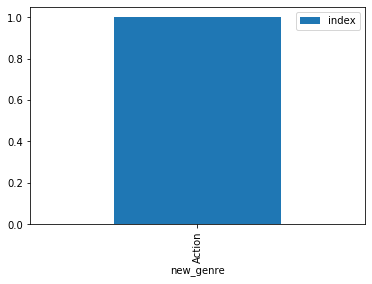

In [66]:
test_main_street_films=USA_movies.loc[USA_movies['production_company']=='Main Street Films']
main_street_films_test2=test_main_street_films
# test2['new_genre']
genre_main_street_films_list=main_street_films_test2['genre'].str.split(", ", n=2, expand=True)
main_street_films_test2.loc[:,'new_genre']=genre_main_street_films_list[0]
main_street_films_group_test=main_street_films_test2.groupby('new_genre').count()
main_street_films_group_test=main_street_films_group_test.sort_values('index',ascending=False)
main_street_films_group_test
main_street_films_group_test.plot(kind='bar',y='index')

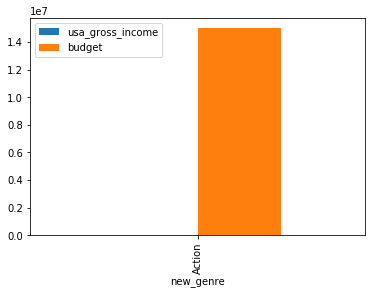

In [67]:
main_street_films_group_test2=main_street_films_test2.groupby('new_genre').mean()
main_street_films_group_test2['budget']
main_street_films_group_test2['usa_gross_income']
main_street_films_group_test2=main_street_films_group_test2.sort_values('usa_gross_income',ascending=False)
main_street_films_group_test2.plot(kind='bar',y=['usa_gross_income','budget'])

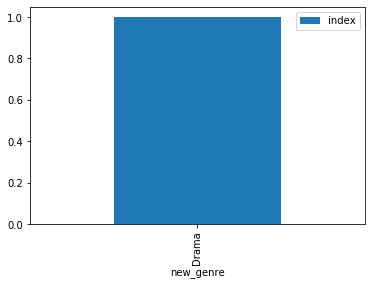

In [63]:
test_redwire_pictures=USA_movies.loc[USA_movies['production_company']=='Redwire Pictures']
redwire_pictures_test2=test_redwire_pictures
# test2['new_genre']
genre_redwire_pictures_list=redwire_pictures_test2['genre'].str.split(", ", n=2, expand=True)
redwire_pictures_test2.loc[:,'new_genre']=genre_code_red_list[0]
redwire_pictures_group_test=redwire_pictures_test2.groupby('new_genre').count()
redwire_pictures_group_test=redwire_pictures_group_test.sort_values('index',ascending=False)
redwire_pictures_group_test
redwire_pictures_group_test.plot(kind='bar',y='index')

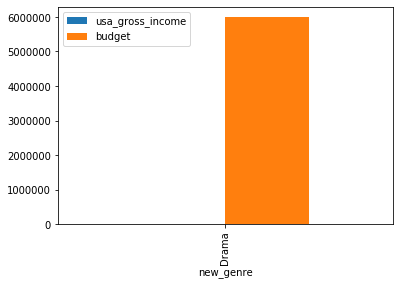

In [64]:
redwire_pictures_group_test2=redwire_pictures_test2.groupby('new_genre').mean()
redwire_pictures_group_test2['budget']
redwire_pictures_group_test2['usa_gross_income']
redwire_pictures_group_test2=redwire_pictures_group_test2.sort_values('usa_gross_income',ascending=False)
redwire_pictures_group_test2.plot(kind='bar',y=['usa_gross_income','budget'])

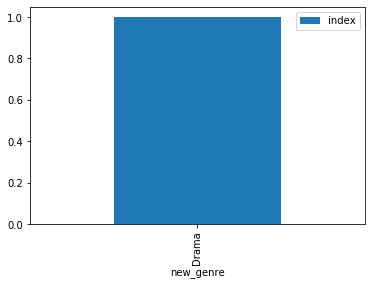

In [60]:
test_code_red=USA_movies.loc[USA_movies['production_company']=='Code Red']
code_red_test2=test_code_red
# test2['new_genre']
genre_code_red_list=code_red_test2['genre'].str.split(", ", n=2, expand=True)
code_red_test2.loc[:,'new_genre']=genre_code_red_list[0]
code_red_group_test=code_red_test2.groupby('new_genre').count()
code_red_group_test=code_red_group_test.sort_values('index',ascending=False)
code_red_group_test
code_red_group_test.plot(kind='bar',y='index')

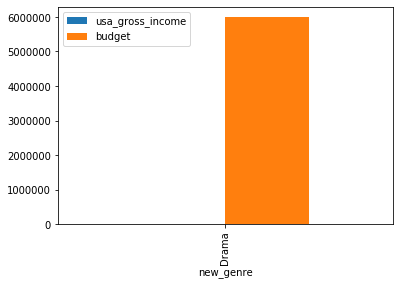

In [61]:
code_red_group_test2=code_red_test2.groupby('new_genre').mean()
code_red_group_test2['budget']
code_red_group_test2['usa_gross_income']
code_red_group_test2=code_red_group_test2.sort_values('usa_gross_income',ascending=False)
code_red_group_test2.plot(kind='bar',y=['usa_gross_income','budget'])

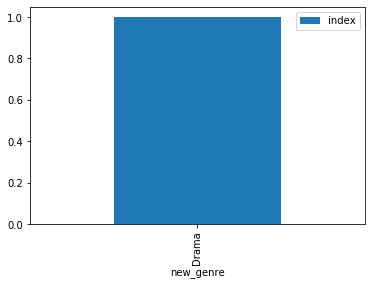

In [57]:
test_mrb_productions=USA_movies.loc[USA_movies['production_company']=='MRB Productions']
mrb_productions_test2=test_mrb_productions
# test2['new_genre']
genre_mrb_productions_list=mrb_productions_test2['genre'].str.split(", ", n=2, expand=True)
mrb_productions_test2.loc[:,'new_genre']=genre_mrb_productions_list[0]
mrb_productions_group_test=mrb_productions_test2.groupby('new_genre').count()
mrb_productions_group_test=mrb_productions_group_test.sort_values('index',ascending=False)
mrb_productions_group_test
mrb_productions_group_test.plot(kind='bar',y='index')

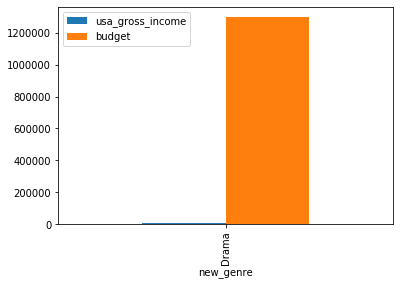

In [58]:
mrb_productions_group_test2=mrb_productions_test2.groupby('new_genre').mean()
mrb_productions_group_test2['budget']
mrb_productions_group_test2['usa_gross_income']
mrb_productions_group_test2=mrb_productions_group_test2.sort_values('usa_gross_income',ascending=False)
mrb_productions_group_test2.plot(kind='bar',y=['usa_gross_income','budget'])

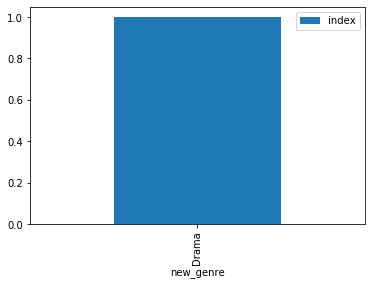

In [59]:
test_enderby_entertainment=USA_movies.loc[USA_movies['production_company']=='Enderby Entertainment']
enderby_entertainment_test2=test_enderby_entertainment
# test2['new_genre']
genre_enderby_entertainment_list=enderby_entertainment_test2['genre'].str.split(", ", n=2, expand=True)
enderby_entertainment_test2.loc[:,'new_genre']=genre_enderby_entertainment_list[0]
enderby_entertainment_group_test=enderby_entertainment_test2.groupby('new_genre').count()
enderby_entertainment_group_test=enderby_entertainment_group_test.sort_values('index',ascending=False)
enderby_entertainment_group_test
enderby_entertainment_group_test.plot(kind='bar',y='index')

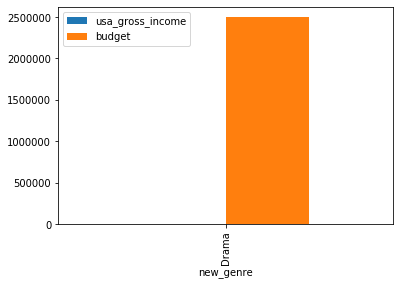

In [56]:
enderby_entertainment_group_test2=enderby_entertainment_test2.groupby('new_genre').mean()
enderby_entertainment_group_test2['budget']
enderby_entertainment_group_test2['usa_gross_income']
enderby_entertainment_group_test2=enderby_entertainment_group_test2.sort_values('usa_gross_income',ascending=False)
enderby_entertainment_group_test2.plot(kind='bar',y=['usa_gross_income','budget'])

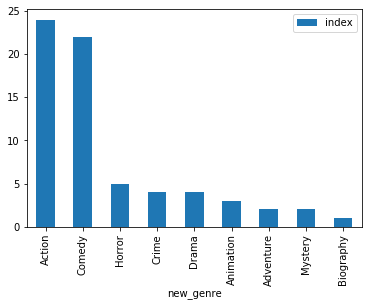

In [50]:
test_paramount_pictures=USA_movies.loc[USA_movies['production_company']=='Paramount Pictures']
paramount_pictures_test2=test_paramount_pictures
# test2['new_genre']
genre_paramount_pictures_list=paramount_pictures_test2['genre'].str.split(", ", n=2, expand=True)
paramount_pictures_test2.loc[:,'new_genre']=genre_paramount_pictures_list[0]
paramount_pictures_group_test=paramount_pictures_test2.groupby('new_genre').count()
paramount_pictures_group_test=paramount_pictures_group_test.sort_values('index',ascending=False)
paramount_pictures_group_test
paramount_pictures_group_test.plot(kind='bar',y='index')

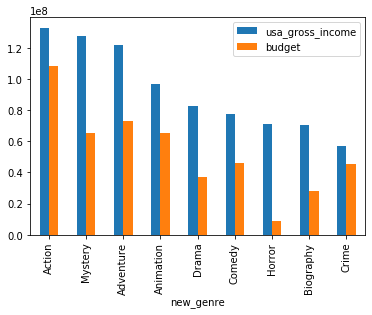

In [53]:
paramount_pictures_group_test2=paramount_pictures_test2.groupby('new_genre').mean()
paramount_pictures_group_test2['budget']
paramount_pictures_group_test2['usa_gross_income']
paramount_pictures_group_test2=paramount_pictures_group_test2.sort_values('usa_gross_income',ascending=False)
paramount_pictures_group_test2.plot(kind='bar',y=['usa_gross_income','budget'])

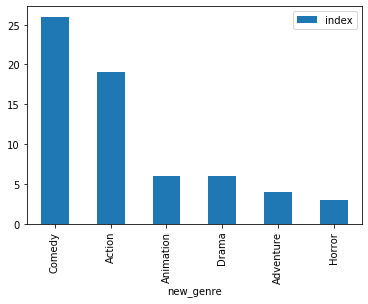

In [47]:
test_twentieth_century_fox=USA_movies.loc[USA_movies['production_company']=='Twentieth Century Fox']
twentieth_century_fox_test2=test_twentieth_century_fox
# test2['new_genre']
genre_twentieth_century_fox_list=twentieth_century_fox_test2['genre'].str.split(", ", n=2, expand=True)
twentieth_century_fox_test2.loc[:,'new_genre']=genre_twentieth_century_fox_list[0]
twentieth_century_fox_group_test=twentieth_century_fox_test2.groupby('new_genre').count()
twentieth_century_fox_group_test=twentieth_century_fox_group_test.sort_values('index',ascending=False)
twentieth_century_fox_group_test
twentieth_century_fox_group_test.plot(kind='bar',y='index')

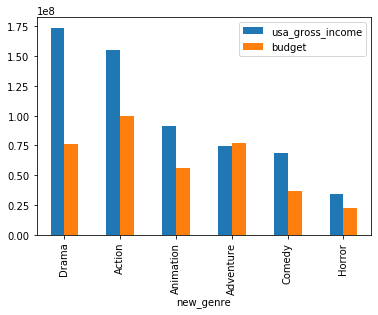

In [48]:
twentieth_century_fox_group_test2=twentieth_century_fox_test2.groupby('new_genre').mean()
twentieth_century_fox_group_test2['budget']
twentieth_century_fox_group_test2['usa_gross_income']
twentieth_century_fox_group_test2=twentieth_century_fox_group_test2.sort_values('usa_gross_income',ascending=False)
twentieth_century_fox_group_test2.plot(kind='bar',y=['usa_gross_income','budget'])

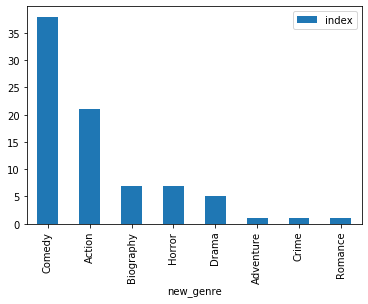

In [45]:
test_universal_pictures=USA_movies.loc[USA_movies['production_company']=='Universal Pictures']
universal_pictures_test2=test_universal_pictures
# test2['new_genre']
genre_universal_pictures_list=universal_pictures_test2['genre'].str.split(", ", n=2, expand=True)
universal_pictures_test2.loc[:,'new_genre']=genre_universal_pictures_list[0]
universal_pictures_group_test=universal_pictures_test2.groupby('new_genre').count()
universal_pictures_group_test=universal_pictures_group_test.sort_values('index',ascending=False)
universal_pictures_group_test
universal_pictures_group_test.plot(kind='bar',y='index')

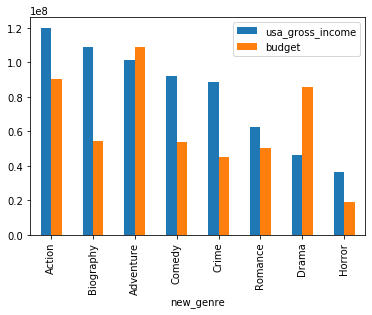

In [46]:
universal_pictures_group_test2=universal_pictures_test2.groupby('new_genre').mean()
universal_pictures_group_test2['budget']
universal_pictures_group_test2['usa_gross_income']
universal_pictures_group_test2=universal_pictures_group_test2.sort_values('usa_gross_income',ascending=False)
universal_pictures_group_test2.plot(kind='bar',y=['usa_gross_income','budget'])

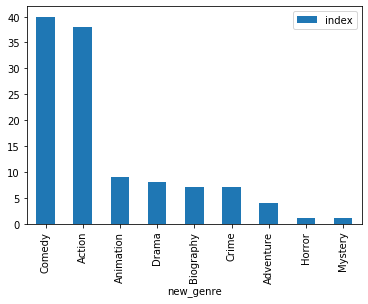

In [38]:
test_columbia=USA_movies.loc[USA_movies['production_company']=='Columbia Pictures']
columbia_test2=test_columbia
# test2['new_genre']
genre_columbia_list=columbia_test2['genre'].str.split(", ", n=2, expand=True)
columbia_test2.loc[:,'new_genre']=genre_columbia_list[0]
columbia_group_test=columbia_test2.groupby('new_genre').count()
columbia_group_test=columbia_group_test.sort_values('index',ascending=False)
columbia_group_test
columbia_group_test.plot(kind='bar',y='index')

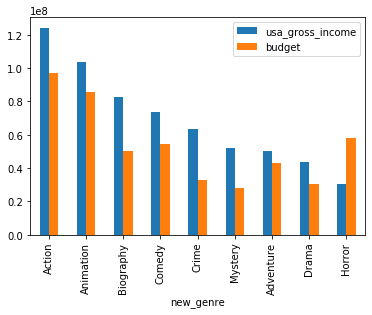

In [39]:
columbia_group_test2=columbia_test2.groupby('new_genre').mean()
columbia_group_test2['budget']
columbia_group_test2['usa_gross_income']
columbia_group_test2=columbia_group_test2.sort_values('usa_gross_income',ascending=False)
columbia_group_test2.plot(kind='bar',y=['usa_gross_income','budget'])

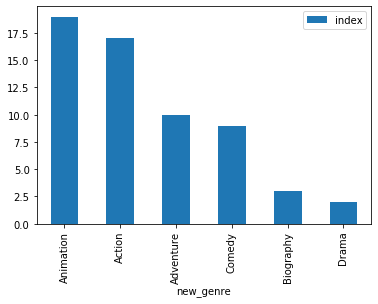

In [41]:
test_disney=USA_movies.loc[USA_movies['production_company']=='Walt Disney Pictures']
disney_test2=test_disney
# test2['new_genre']
genre_disney_list=disney_test2['genre'].str.split(", ", n=2, expand=True)
disney_test2.loc[:,'new_genre']=genre_disney_list[0]
disney_group_test=disney_test2.groupby('new_genre').count()
disney_group_test=disney_group_test.sort_values('index',ascending=False)
disney_group_test
disney_group_test.plot(kind='bar',y='index')

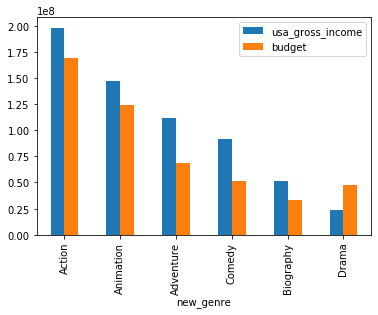

In [42]:
disney_group_test2=disney_test2.groupby('new_genre').mean()
disney_group_test2['budget']
disney_group_test2['usa_gross_income']
disney_group_test2=disney_group_test2.sort_values('usa_gross_income',ascending=False)
disney_group_test2.plot(kind='bar',y=['usa_gross_income','budget'])

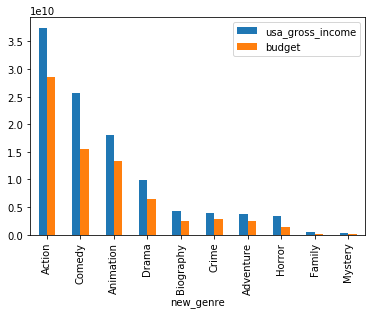

In [18]:
genre_list=USA_movies['genre'].str.split(", ", n=2, expand=True)
USA_movies['new_genre']=genre_list[0]
genre_list
grouped_genre=USA_movies.groupby('new_genre').sum()
sort_genre=grouped_genre.sort_values('usa_gross_income',ascending=False)
sort_genre
top_10_genre=sort_genre.iloc[0:10]
top_10_genre
top_10_genre.plot(kind='bar',y=['usa_gross_income','budget'])

In [19]:
sort_USA_movies=USA_movies.sort_values('usa_gross_income',ascending=False)
sort_USA_movies[['title','budget','usa_gross_income','year','production_company']].head()

,title,budget,usa_gross_income,year,production_company
1374,Star Wars: Episode VII - The Force Awakens,245000000,936662225,2015,Lucasfilm
720,Avatar,237000000,760507625,2009,Twentieth Century Fox
53,Titanic,200000000,659363944,1997,Twentieth Century Fox
485,Jurassic World,150000000,652270625,2015,Universal Pictures
785,The Avengers,220000000,623357910,2012,Marvel Studios


In [20]:
sort_budget_USA_movies=USA_movies.sort_values('budget',ascending=False)
sort_budget_USA_movies[['title','budget','usa_gross_income','year']].head(20)

,title,budget,usa_gross_income,year
1376,Star Wars: Episode VIII - The Last Jedi,317000000,620181382,2017
633,Pirates of the Caribbean: At World's End,300000000,309420425,2007
443,Superman Returns,270000000,200081192,2006
539,Tangled,260000000,200821936,2010
572,Spider-Man 3,258000000,336530303,2007
1419,Batman v Superman: Dawn of Justice,250000000,330360194,2016
1455,Captain America: Civil War,250000000,408084349,2016
545,John Carter,250000000,73078100,2012
1362,Avengers: Age of Ultron,250000000,459005868,2015
1374,Star Wars: Episode VII - The Force Awakens,245000000,936662225,2015


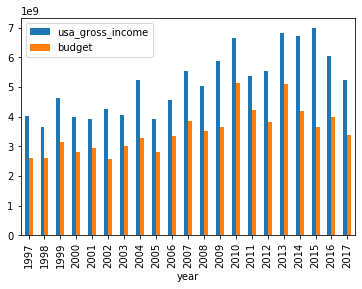

In [21]:
grouped_year=USA_movies.groupby('year').sum()
grouped_year.plot(kind='bar',y=['usa_gross_income','budget'])

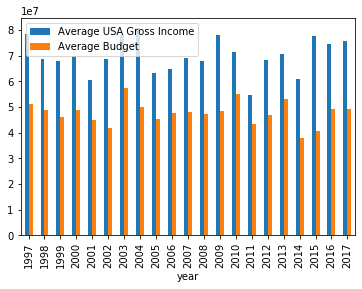

In [68]:
new_grouped_year=USA_movies.groupby('year').count()
number_titles=new_grouped_year['title']
number_titles
grouped_year['Number of titles']=number_titles
grouped_year['Average USA Gross Income']=grouped_year['usa_gross_income']/grouped_year['Number of titles']
grouped_year['Average Budget']=grouped_year['budget']/grouped_year['Number of titles']
grouped_year.plot(kind='bar',y=['Average USA Gross Income','Average Budget'])

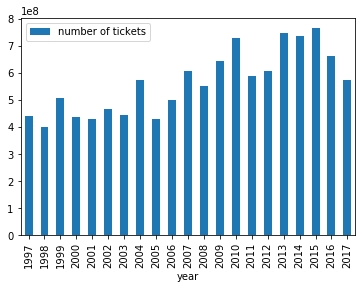

In [22]:
#average ticket price from National Association of Theatre Owners
ticket_price=[4.59,4.69,5.06,5.39,5.65,5.80,6.03,6.21,6.41,6.55,6.88,7.18,7.50,7.89,7.93,7.96,8.13,8.17,8.43,8.65,8.97,9.11,9.11]
for ticket in ticket_price:
    grouped_year['number of tickets']=grouped_year['usa_gross_income']/ticket
grouped_year.plot(kind='bar',y='number of tickets')

In [ ]:
grouped_year['number of tickets']=grouped_year['usa_gross_income']/ticket
grouped_year.plot(kind='bar',y='number of tickets')

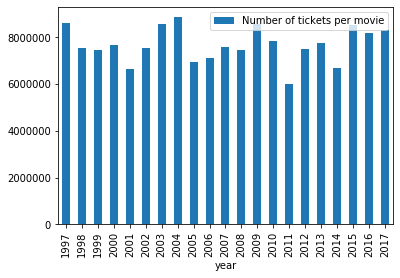

In [69]:
grouped_year['Number of tickets per movie']=grouped_year['number of tickets']/grouped_year['Number of titles']
grouped_year.plot(kind='bar',y='Number of tickets per movie')

The r_value is 0.7096465604529201


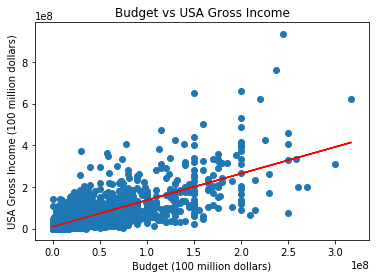

In [72]:
(slope,intercept,r_value,_,_)=linregress(USA_movies['budget'],USA_movies['usa_gross_income'])
print(f'The r_value is {r_value}')
fit=slope*USA_movies['budget']+intercept
fig, ax= plt.subplots()
ax.plot(USA_movies['budget'],fit,c='r')
ax.scatter(USA_movies['budget'],USA_movies['usa_gross_income'])
plt.xlabel('Budget (100 million dollars)')
plt.ylabel('USA Gross Income (100 million dollars)')
plt.title('Budget vs USA Gross Income')
plt.show()

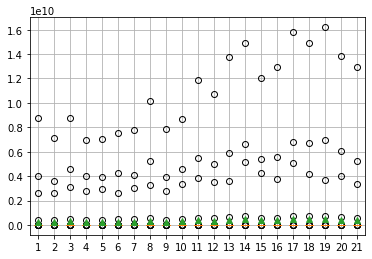

In [24]:
plt.boxplot(grouped_year,showmeans=True)
plt.grid()
plt.show()

In [25]:
USA_movies['worlwide_gross_income']

0        76019048.0
1        50068310.0
2       161376068.0
3        44229441.0
4       136885767.0
           ...     
1547     40140972.0
1548     17644496.0
1549     48333932.0
1550      1951683.0
1551      3697729.0
Name: worlwide_gross_income, Length: 1552, dtype: float64

In [ ]:
# If the data is in a dataframe, we use pandas to give quartile calculations
quartiles = usa_gross_income.quartiles([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
print(f"The lower quartile of Gross Income is: {lowerq}")
print(f"The upper quartile of Gross Income is: {upperq}")
print(f"The interquartile range of Gross Income is: {iqr}")
print(f"The the median of Gross Income is: {quartiles[0.5]} ")
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")